In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go


% matplotlib inline 

# matplotlib inline :only draw static images in the notebook

ModuleNotFoundError: No module named 'plotly'

In [12]:
events=pd.read_csv("events.csv")
noc = pd.read_csv("noc_regions.csv")

In [16]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [17]:
noc.head(2)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles


In [18]:
# rename to capital letters
noc.rename(columns={'region': 'Region', 'notes': 'Notes'}, inplace = 'True');

In [19]:
#lets merge the two tables
df = event.merge(noc, how = 'left', on = 'NOC') # here we did a left join on NOC
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [20]:
df.shape

(271116, 17)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [23]:
df.describe()
## here we can see : Minimum year is **1896** , its when the olympics started and recent one here is in **2016**

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [24]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [30]:
df.duplicated().sum()
#to check duplication

1385

In [31]:
df.drop_duplicates(inplace=True)

In [33]:
df.duplicated().sum()
# confirmation that all duplicated data has been removed

0

In [40]:
# checking for null values
NaN_values = df.isna()
NaN_columns = NaN_values.any()
NaN_columns 
# true for columns value missing value

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [38]:
df.query('Team == "Netherlands"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [41]:
# let see the data 4 specific countries
# like person who participate for China from starting of olympics(mean all athelet participate over the time)
df.query('Team == "China"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
1072,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
2611,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
2612,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [84]:
df.shape
#The value_counts()function is used to get a Series containing counts of unique values. 
#The resulting object will be in descending order so that ...the first element is the most frequently-occurring element. Excludes NA values by default.

(269731, 17)

In [175]:
# total no of males and female count who paticipated over the year in overall olympics
gender_counts = df.Sex.value_counts()
gender_counts

M    195353
F     74378
Name: Sex, dtype: int64

In [114]:
# filter by season=summer (ss)

ss= df[df['Season']=='Summer']
ss.shape

(221167, 17)

In [174]:
# for  summer_olympic_sports
summer_sports = ss[ss.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [172]:
ws= df[df['Season']=='Winter']
ws.shape

(48564, 17)

In [173]:
# for  winter_olympic_sports
winter_sports = ws[ws.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [194]:
# now time to find out the cities in which it is played
ss['City'].unique().shape
# in total 23 cities olympics tooks place

(23,)

In [195]:
# different sports played
ss['Sport'].unique().shape

(52,)

In [196]:
ss['Event'].unique().shape
# in 651 different categories of events/sports

(651,)

In [197]:
# to find no of athelets who played olympics by far
ss['Name'].unique().shape

(116122,)

In [198]:
# now we want to plot over the years/no of participating nation 
# so first we drop all the duplicates on the basis of year and region
ss.drop_duplicates(['Year','Region'])

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242212,121320,Horatio Tertuliano Torrom,M,NaN,NaN,NaN,Argentina,ARG,1908 Summer,1908,Summer,London,Figure Skating,Figure Skating Men's Singles,NaN,Argentina,NaN
247372,123858,Lloyd Oscar Valberg,M,26.0,NaN,NaN,Singapore,SGP,1948 Summer,1948,Summer,London,Athletics,Athletics Men's High Jump,NaN,NaN,NaN
255445,127894,Bruno Julius Wagner,M,25.0,185.0,82.0,Switzerland,SUI,1908 Summer,1908,Summer,London,Athletics,Athletics Men's Hammer Throw,NaN,Switzerland,NaN
262198,131186,Antoni Wiwulski,M,35.0,NaN,NaN,Poland,POL,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Sculpturing,NaN,Poland,NaN


In [199]:
ss.drop_duplicates(['Year','Region']).shape

(2786, 17)

In [200]:
#who are the top countries that are participating

Top_10_Countries = ss.Team.value_counts().sort_values(ascending = False).head(10)
Top_10_Countries

United States    14277
Great Britain    10169
France            9850
Italy             8004
Germany           7282
Australia         6975
Canada            6636
Japan             6213
Hungary           6034
Sweden            5773
Name: Team, dtype: int64

In [201]:
#No olympics in 
years_of_olympics= ss['Year'].unique().tolist()
years_of_olympics.sort()
years_of_olympics

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [202]:
ss['Year'].unique().shape

(29,)

In [203]:
# if we see here no of olympics happen 28 times..... but here shows 29....
#  Actually the olympic of 1906 was discarded.so we shape[0]-1
ss['Year'].unique().shape[0]-1

28

In [204]:
#####Overall analysis

# how many countries participated in summer olympics in total
total_countries_participated = ss['Region'].unique()
total_countries_participated.shape

(206,)

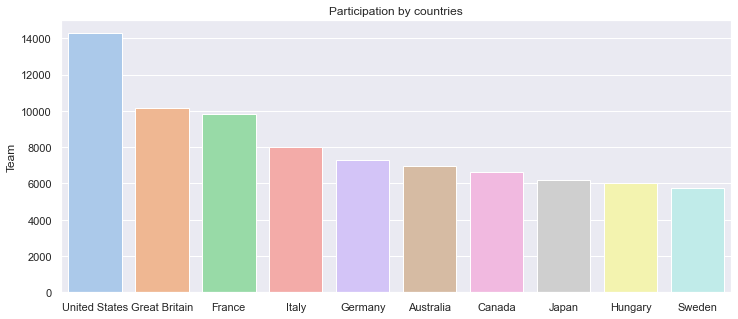

In [205]:
# let visualize it in graph
plt.figure(figsize =(12,5))
plt.title("Participation by countries")
sns.barplot(x=Top_10_Countries.index, y= Top_10_Countries, palette='pastel');

In [207]:
country_participated = ss.drop_duplicates(['Year','Region'])['Year'].value_counts().reset_index().sort_values('index')
# this give no of nation participated w.r.t to every year
country_participated.head()

,index,Year
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22


In [208]:
country_participated.rename(columns= {'index':'Year', 'Year': 'NO_OF_COUNTRIES'}, inplace = True)
country_participated.head()

,Year,NO_OF_COUNTRIES
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22


In [148]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install plotly

In [145]:
# We are going to plot using plotly
import plotly.express as px
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots


In [209]:
fig= px.line(country_participated, x='Year', y='NO_OF_COUNTRIES')
fig.show()
#u can see clearly ... in 1980 very less countries participated. it was in moscow...
# and many of nation boycott due to russian attack on afganistan

In [210]:
# total no of medals in summer olympics
ss.Medal.value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [211]:
# so first we remove alll duplicates
fdf= ss.drop_duplicates(subset=['Team','NOC','Games','Sport','City','Year','Event','Medal'])
fdf.shape

(105636, 17)

 Age & gender based variation in summer olympics

(array([2.0000e+00, 1.1500e+02, 1.2960e+03, 3.9850e+03, 8.3560e+03,
        1.3660e+04, 1.6616e+04, 1.6016e+04, 1.2908e+04, 9.7590e+03,
        6.4050e+03, 4.2790e+03, 2.7290e+03, 1.7520e+03, 1.1990e+03,
        9.4400e+02, 6.6700e+02, 5.1100e+02, 3.1300e+02, 2.6000e+02,
        1.5600e+02, 1.1400e+02, 8.8000e+01, 6.5000e+01, 4.2000e+01,
        3.1000e+01, 3.0000e+01, 1.7000e+01, 1.5000e+01, 8.0000e+00,
        8.0000e+00, 5.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <BarContainer object of 34 artists>)

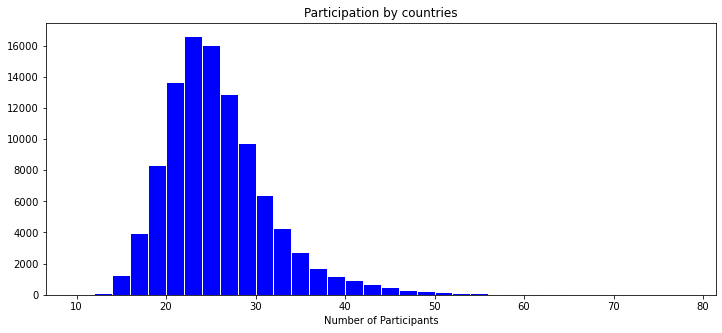

In [154]:
#age distribute of ATheletes. for this we are going to use a histogram
plt.figure(figsize =(12,5))
plt.title("Participation by countries")
plt.xlabel('Age')
plt.xlabel('Number of Participants')
plt.hist(fdf.Age, bins = np.arange(10,80,2), color = 'blue', edgecolor = 'white') 
# arrange between age of 10 ---80 with difference of 2

In [155]:
# total no of males and female count who paticipated over the year
gender_counts = fdf.Sex.value_counts()
gender_counts

M    76739
F    28897
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7fa499a1c2e0>,
 [Text(0.2053750991470662, -1.0806577018882217, 'M'),
  Text(-0.20537499796859007, 1.0806577211168213, 'F')],
 [Text(0.11202278135294519, -0.5894496555753936, '72.6%'),
  Text(-0.11202272616468548, 0.5894496660637207, '27.4%')])

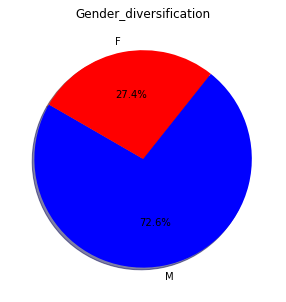

In [160]:
plt.figure(figsize =(12,5))
plt.title("Gender_diversification")
plt.pie(gender_counts, labels=gender_counts.index, startangle= 150,autopct ='%1.1f%%', shadow= True,colors="bright")
#  We use autopct to display the percent value using Python string formatting.
#  For example, autopct='%1.1f%%' means that for each pie wedge, the format string is '1.1f%'.
#  Here we can clearly see the no of male participants ten female Participants



In [212]:
# Total no of female count in summer olympics
female_participants = fdf[(fdf.Sex=='F')& (fdf.Season == 'Summer')][['Sex','Year']]
#we are trying to filter data for summer olympics
female_participants= female_participants.groupby('Year').count().reset_index() 
#printing participation by eaxch year
female_participants.tail()

# we can clearly see , 2016 olympics there is more participation of female atheletes

,Year,Sex
23,2000,2787
24,2004,2869
25,2008,3067
26,2012,3232
27,2016,3319


In [213]:
women_in_olympics = fdf[(fdf.Sex=='F')&(fdf.Season == 'Summer')]
olympics_women.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN


Text(0.5, 1.0, 'Women participation over the year')

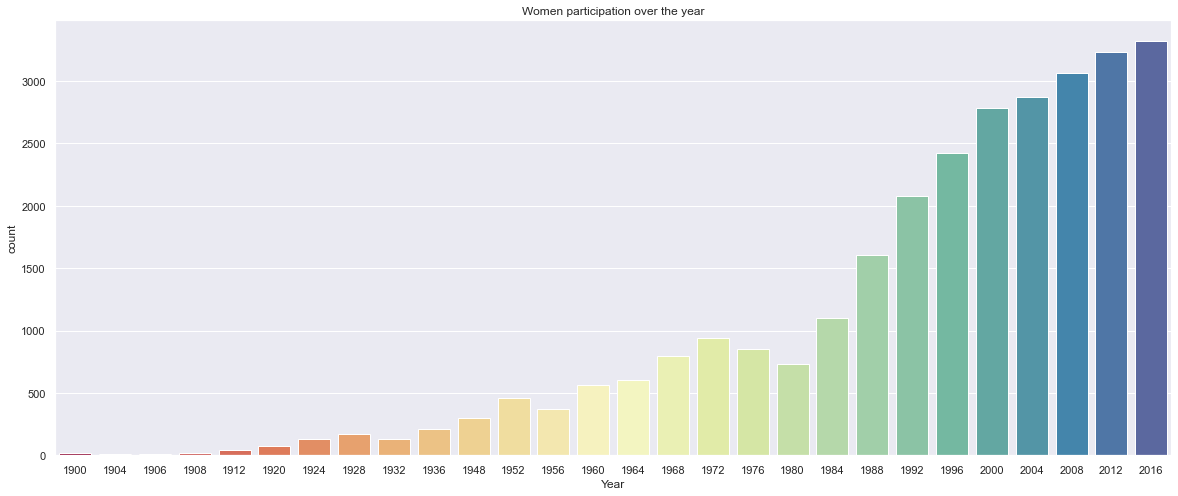

In [214]:
sns.set(style = "darkgrid")
plt.figure(figsize= (20,8))
sns.countplot( x= 'Year', data= women_in_olympics, palette='Spectral')
plt.title('Women participation over the year')

#here u can see that, 2016 has highest women participation


part = olympics_women.groupby('Year')['Sex'].value_counts()
plt.figure(figsize= (20,8))
part.loc[:,'F'].plot()
plt.title('plot of Women athelets over the time')

#  Its line graph, women participation decrease  during 1950

In [239]:
fdf.duplicated().sum()


0

In [241]:
ss.shape


(221167, 17)

In [242]:
fdf.shape

(105636, 17)

In [251]:
# calulate total no of medals in olympics including NAN values
fdf['Medal'].value_counts()


Bronze    5612
Gold      5246
Silver    5216
Name: Medal, dtype: int64

In [252]:
pd.get_dummies(fdf['Medal'])
# Nan=0
#Gold = !

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
26,0,0,0
...,...,...,...
271078,0,0,1
271080,1,0,0
271087,0,0,0
271088,0,0,0


In [258]:
#concatenate in order to get data medal wise
fdf = pd.concat([fdf,pd.get_dummies(fdf['Medal'])],axis= 1)
fdf.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [278]:
fdf_ind= fdf[(fdf['NOC'] == 'IND') & (fdf['Medal']== 'Gold')]
fdf_ind.shape

(9, 20)

In [279]:
fdf_china= fdf[(fdf['NOC'] == 'CHN') & (fdf['Medal']== 'Gold')]
fdf_china.shape

(227, 20)

In [264]:
#Let get the count of Medal /region
Medal_per_region= fdf.groupby('NOC').sum()[['Gold','Silver','Bronze']]
Medal_per_region.head()

,Gold,Silver,Bronze
NOC,,,
AFG,0.0,0.0,2.0
AHO,0.0,1.0,0.0
ALB,0.0,0.0,0.0
ALG,5.0,4.0,8.0
AND,0.0,0.0,0.0


In [265]:
Medal_per_region.sort_values('Gold',ascending=False)

,Gold,Silver,Bronze
NOC,,,
USA,1035.0,802.0,708.0
URS,394.0,317.0,294.0
GBR,278.0,317.0,300.0
GER,235.0,261.0,283.0
FRA,234.0,256.0,287.0
...,...,...,...
AHO,0.0,1.0,0.0
LBR,0.0,0.0,0.0
LCA,0.0,0.0,0.0


In [268]:
Medal_per_region['Total']= Medal_per_region['Gold'] + Medal_per_region['Silver']+ Medal_per_region['Bronze'] 
Medal_per_region

,Gold,Silver,Bronze,Total
NOC,,,,
AFG,0.0,0.0,2.0,2.0
AHO,0.0,1.0,0.0,1.0
ALB,0.0,0.0,0.0,0.0
ALG,5.0,4.0,8.0,17.0
AND,0.0,0.0,0.0,0.0
...,...,...,...,...
YEM,0.0,0.0,0.0,0.0
YMD,0.0,0.0,0.0,0.0
YUG,26.0,29.0,28.0,83.0


In [274]:
fdf_CHINA= fdf[(fdf['NOC'] == 'AFG') & (fdf['Medal']== 'Gold')]
fdf_ind.shape

(227, 20)

In [222]:
# Take only the value  that is different from Nan values
total_gold_medal= total_gold_medal[np.isfinite(goldmedals['Age'])]
total_gold_medal.head(2)
#T

<ipython-input-222-8c5274ef013c>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN


In [224]:
# how many get gold after age 60

gold_medals_in_60 = total_gold_medal['Name'][total_gold_medal['Age'] >60]
gold_medals_in_60.count()

2

In [225]:
#sport_event
sport_event= total_gold_medal['Sport'][total_gold_medal['Age'] >60]
sport_event

104003    Art Competitions
105199               Roque
Name: Sport, dtype: object

/Users/neetinsingh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'gold medalsfor athelets over 60 years')

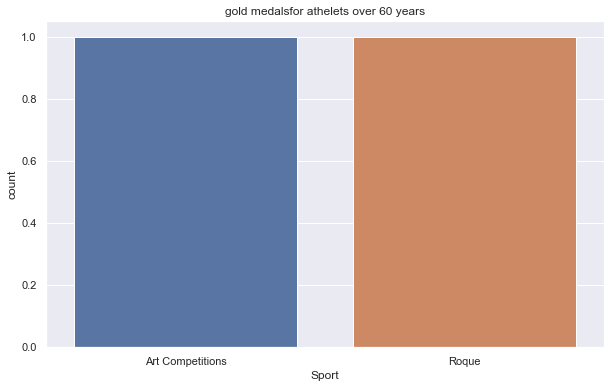

In [226]:
# plot for sporting event
plt.figure(figsize= (10,6))
plt.tight_layout()
sns.countplot(sport_event)
plt.title('gold medalsfor athelets over 60 years')

In [229]:
# total gold/countries
gold_per_countries=total_gold_medal.Region.value_counts().reset_index(name ='Medal').head(5)

Text(0.5, 1.0, 'Medal per country')

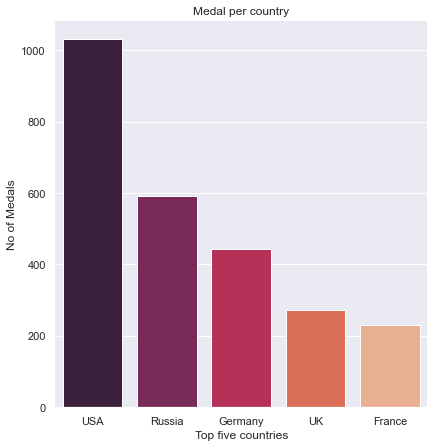

In [230]:
#lets create plot for above
x= sns.catplot(x='index', y='Medal',data= gold_per_countries, height=6, kind='bar',palette='rocket')

# Catplot:This function provides access to several axes-level functions that show the relationship between a
# numerical and one or more categorical variables using one of several visual representations. The kind parameter 
# selects the underlying axes-level function to use:
# seaborn.despine:Remove the top and right spines from plot(s).


x.despine(left = True)
x.set_xlabels('Top five countries')
x.set_ylabels('No of Medals')
plt.title("Medal per country")

In [ ]:
## **# heat map for number of events in every sports**


In [280]:
events_per_sport= fdf.drop_duplicates(['Year','Sport','Event'])

<AxesSubplot:xlabel='Year', ylabel='Sport'>

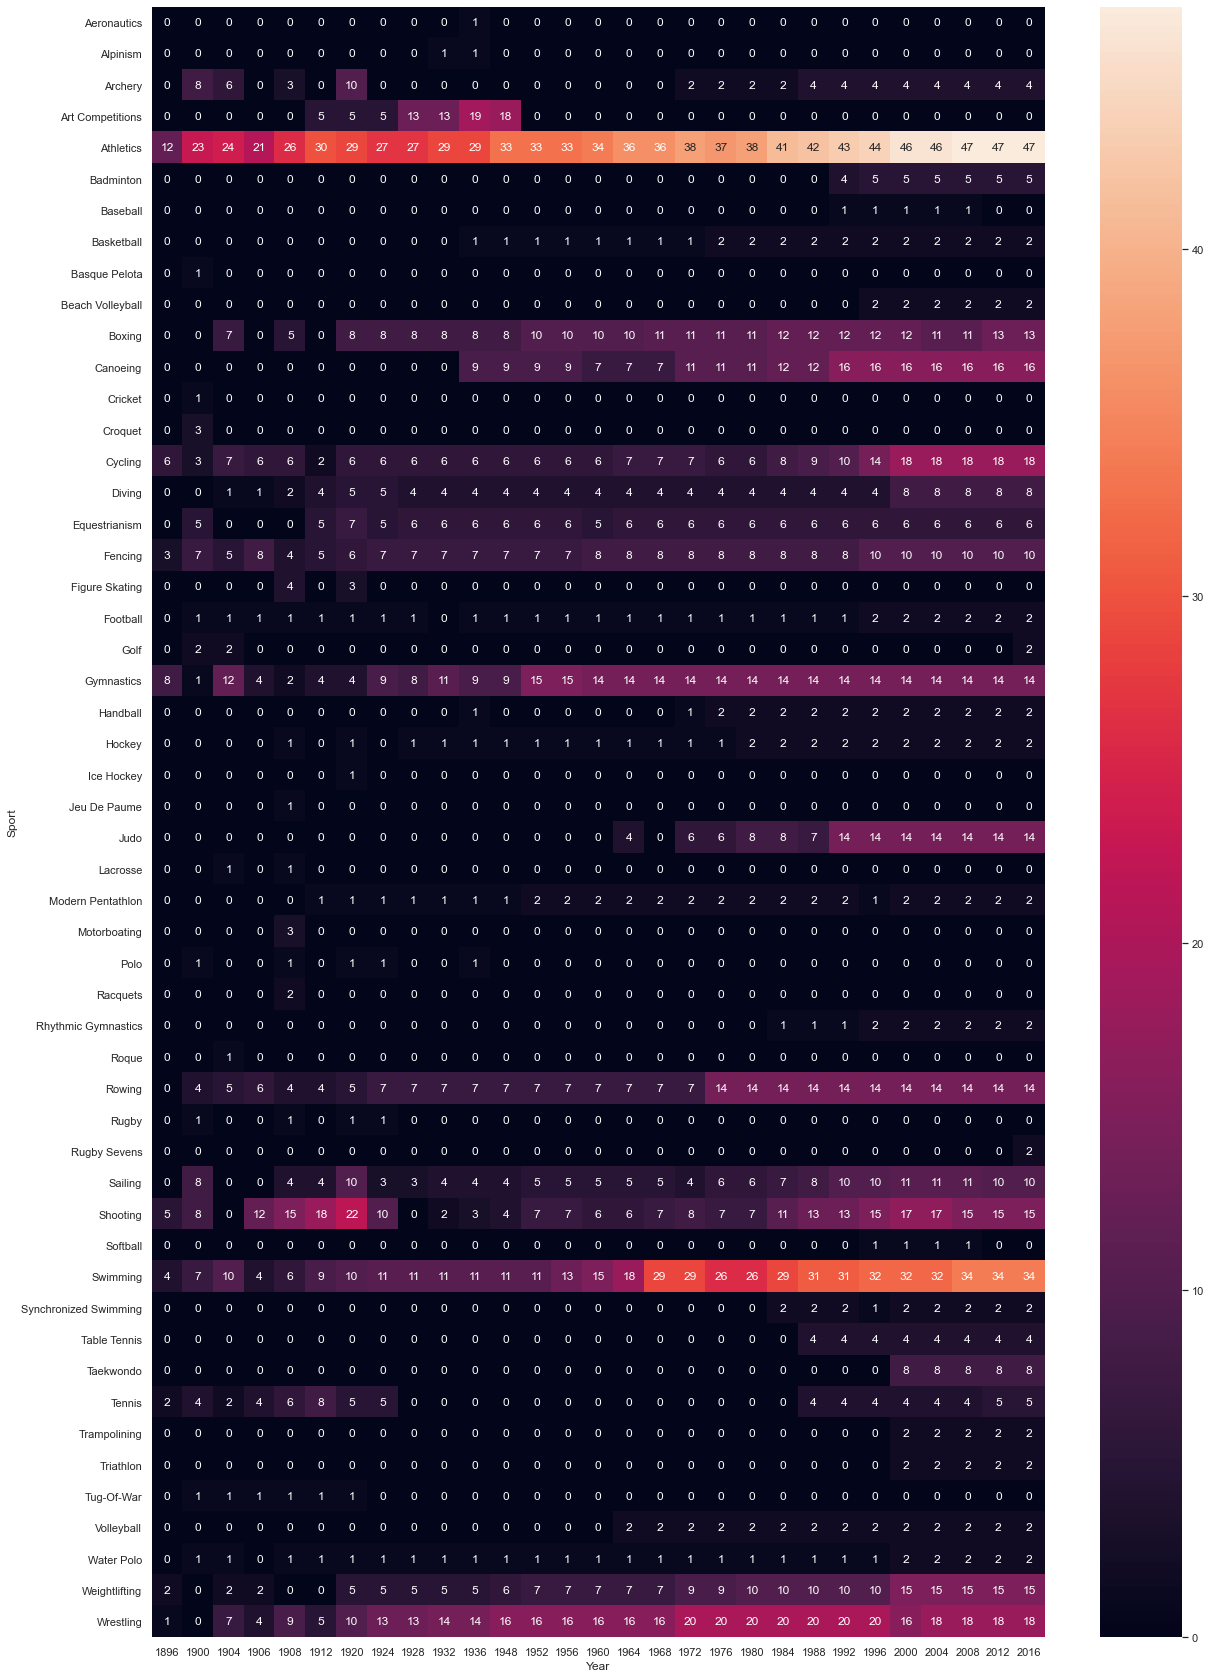

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(events_per_sport.pivot_table(index = 'Sport',columns='Year', values = 'Event',aggfunc='count').fillna(0).astype('int'),annot=True)

#fill 0's here
#astype to convert float into int
#annot provide numbers on heat chart

In [ ]:
#Countrywise medal_tally per yeartop10 successful athelets

In [286]:
fdf
df1=fdf.dropna(subset=['Medal'])
df1
# drop all the Nan Values from Medal column

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1,0,0
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,1,0,0
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,1,0,0
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271010,135521,Anton Zwerina,M,23.0,NaN,66.0,Austria,AUT,1924 Summer,1924,Summer,Paris,Weightlifting,Weightlifting Men's Lightweight,Silver,Austria,NaN,0,0,1
271032,135535,Claudia Antoinette Zwiers,F,22.0,181.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Judo,Judo Women's Middleweight,Bronze,Netherlands,NaN,1,0,0
271076,135553,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.0,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold,Russia,NaN,0,1,0
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1


In [288]:
#in order to get data, we need to filter regionwise,it give year wise medal count of particular region
df_ger=df1[df1['Region']=='Germany']
final_df= df_ger.groupby('Year').count()['Medal'].reset_index()
final_df.head()

,Year,Medal
0,1896,14
1,1900,9
2,1904,16
3,1906,14
4,1908,13
5,1912,26
6,1928,39
7,1932,24
8,1936,101
9,1952,24


In [289]:
#line plot .......year wise medal count of particular region........ here for germany
fig= px.line(final_df, x='Year', y= 'Medal')
fig.show()

<AxesSubplot:xlabel='Year', ylabel='Sport'>

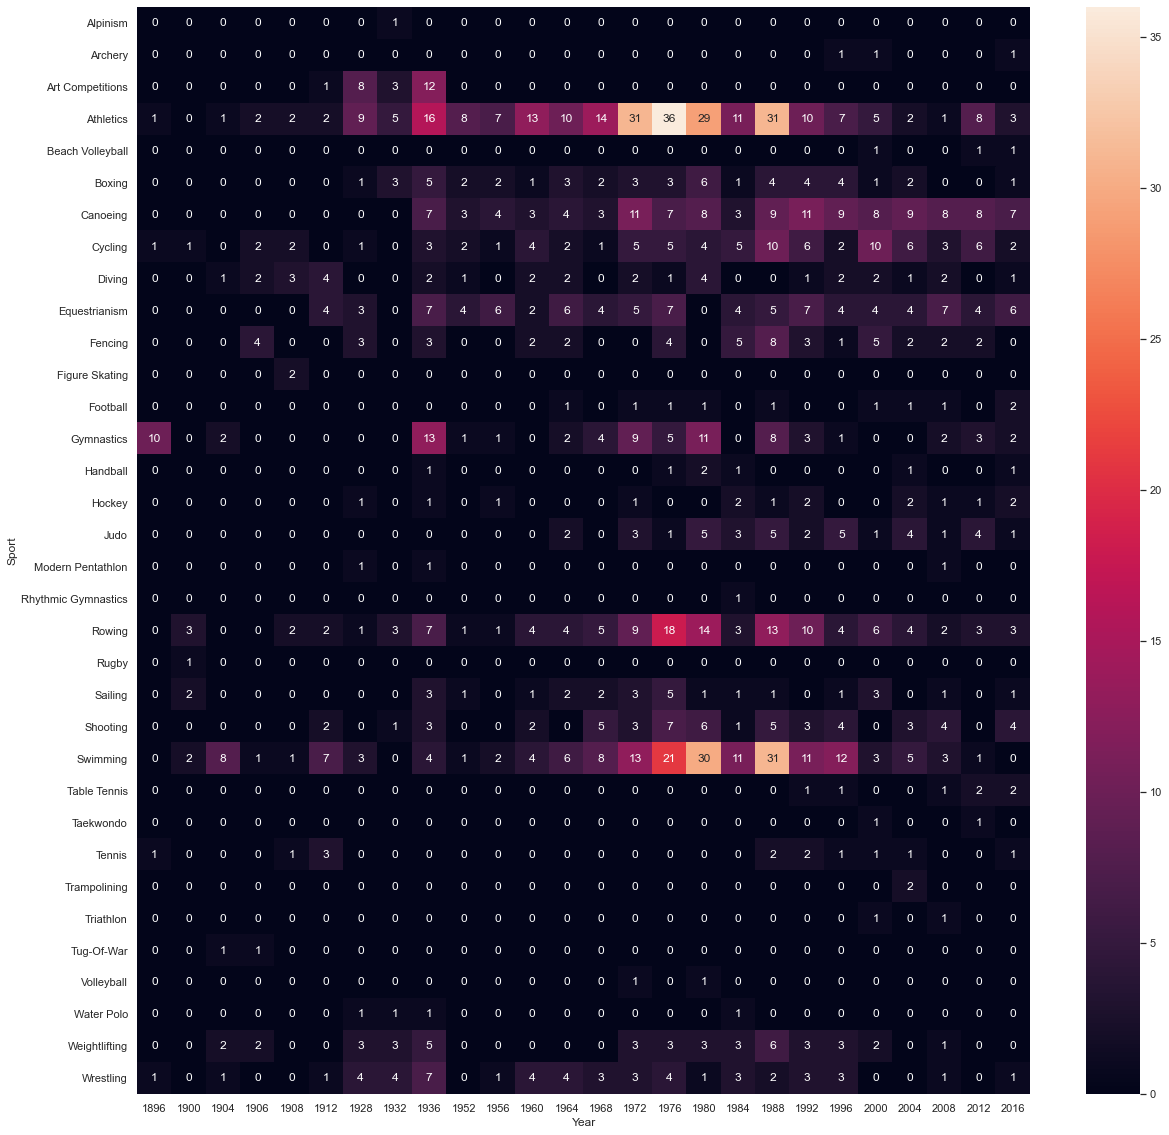

In [290]:
plt.figure(figsize=(20,20))
sns.heatmap(df_ger.pivot_table(index = 'Sport',columns='Year', values = 'Medal',aggfunc='count').fillna(0).astype('int'),annot=True)

# it show in which sport germany good in.... showing result w.r.t year
# it show where germany good in 

In [296]:
import plotly.figure_factory as ff
age_of_athelets= fdf.drop_duplicates(subset=['Name','Region'])

In [311]:
a1 = age_of_athelets['Age'].dropna()
a2 = age_of_athelets[age_of_athelets['Medal']=='Gold']['Age'].dropna()
a3 = age_of_athelets[age_of_athelets['Medal']=='Silver']['Age'].dropna()
a4 = age_of_athelets[age_of_athelets['Medal']=='Bronze']['Age'].dropna()

colors = ['Blue','Gold', 'Silver','Brown']


In [312]:
fig = ff.create_distplot([a1,a2,a3,a4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist= False, show_rug= False,  colors=colors)
fig.show()
# analysis --at small age chanches of winning silver 
# is mor in comparisonu are 20-25 peak age ,chace of winning gold more


/Users/neetinsingh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Weight', ylabel='Height'>

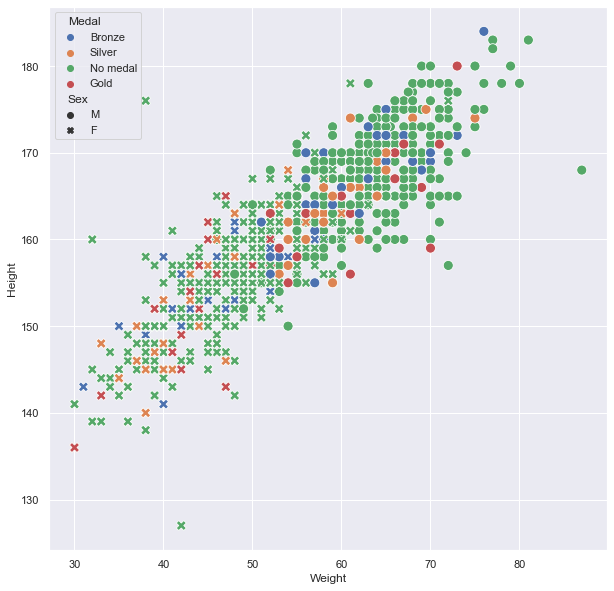

In [306]:
age_of_athelets['Medal'].fillna('No medal',inplace = True)
plt.figure(figsize=(10,10))
df4=age_of_athelets[age_of_athelets['Sport']=='Gymnastics'] #here filter by sport
sns.scatterplot(df4['Weight'],df4['Height'],hue=df4['Medal'],style=df4['Sex'],s=100)#size=100

In [301]:
#Men vs women participation over the olympics()
men= age_of_athelets[age_of_athelets['Sex']== 'M'].groupby('Year').count()['Name'].reset_index()
women= age_of_athelets[age_of_athelets['Sex']== 'F'].groupby('Year').count()['Name'].reset_index()
final= men.merge(women, on='Year',how='left')
final.rename(columns={'Name_x':'Male', 'Name_y':'Female'},inplace= True)
final

,Year,Male,Female
0,1896,122,NaN
1,1900,401,13.0
2,1904,250,4.0
3,1906,332,5.0
4,1908,556,16.0
5,1912,657,27.0
6,1920,928,50.0
7,1924,1161,84.0
8,1928,1103,134.0
9,1932,696,81.0


In [302]:
final.fillna(0,inplace=True)

In [303]:
fig=px.line(final, x="Year",y="Male")
fig.show()

In [231]:
#recent rio olympics 2016 evaluation
max_year = fdf.Year.max()
max_year

2016

In [233]:
name_of_team=fdf[(fdf.Year==max_year) & (fdf.Medal =='Gold')].Team
name_of_team

1080             Jordan
1495      Great Britain
1849      United States
1850      United States
2453        Indonesia-1
              ...      
265879           France
268857            China
269117            China
269277            China
270281       Uzbekistan
Name: Team, Length: 307, dtype: object

In [234]:
#Top 10 countries with most no of goldmedals


United States    45
Great Britain    27
China            25
Russia           18
Germany          16
Japan            12
France           10
South Korea       9
Australia         8
Hungary           8
Name: Team, dtype: int64

Text(0.5, 0, 'countrywise medal in the 2016 year')

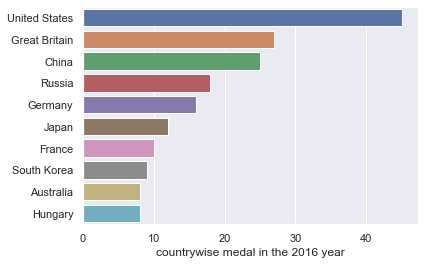

In [235]:
sns.barplot(x=name_of_team.value_counts().head(10), y= name_of_team.value_counts().head(10).index)
plt.xlabel('countrywise medal in the 2016 year')